# __Analyzing New York City Taxi Trips__
#### Project by Nikolas White

### __Data Collection/Cleaning__

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To handle date and time data
from datetime import datetime

# Suppress scientific notation in Pandas for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the dataset from the local file
file_path = "NYC_taxi_data.csv"
taxi_data = pd.read_csv(file_path)

# Print the column names to verify
print(taxi_data.columns)

# Assigning the correct column names
pickup_datetime_col = 'pickup_datetime'
dropoff_datetime_col = 'dropoff_datetime'
trip_duration_col = 'trip_duration'

# Convert pickup and dropoff datetime columns to datetime objects
taxi_data[pickup_datetime_col] = pd.to_datetime(taxi_data[pickup_datetime_col])
taxi_data[dropoff_datetime_col] = pd.to_datetime(taxi_data[dropoff_datetime_col])

# Remove any rows with missing values
taxi_data.dropna(inplace=True)

# Remove any rows with non-positive trip durations
taxi_data = taxi_data[taxi_data[trip_duration_col] > 0]

# Reset index after cleaning
taxi_data.reset_index(drop=True, inplace=True)


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


### __Exploratory Data Analysis__ 
#### General

In [7]:
# Display basic statistics of the dataset
print(taxi_data.describe())

# Extract hour from pickup datetime
taxi_data['pickup_hour'] = taxi_data[pickup_datetime_col].dt.hour

       vendor_id                pickup_datetime  \
count   68621.00                          68621   
mean        1.53  2016-04-01 06:51:16.849230080   
min         1.00            2016-01-01 00:08:07   
25%         1.00            2016-02-17 09:53:42   
50%         2.00            2016-04-01 17:06:40   
75%         2.00            2016-05-14 19:22:00   
max         2.00            2016-06-30 23:45:21   
std         0.50                            NaN   

                    dropoff_datetime  passenger_count  pickup_longitude  \
count                          68621         68621.00          68621.00   
mean   2016-04-01 07:07:01.629661440             1.67            -73.97   
min              2016-01-01 00:19:25             0.00            -74.39   
25%              2016-02-17 10:06:41             1.00            -73.99   
50%              2016-04-01 17:25:06             1.00            -73.98   
75%              2016-05-14 19:45:03             2.00            -73.97   
max            

### __Exploratory Data Analysis__ 
#### Trip Duration Analysis

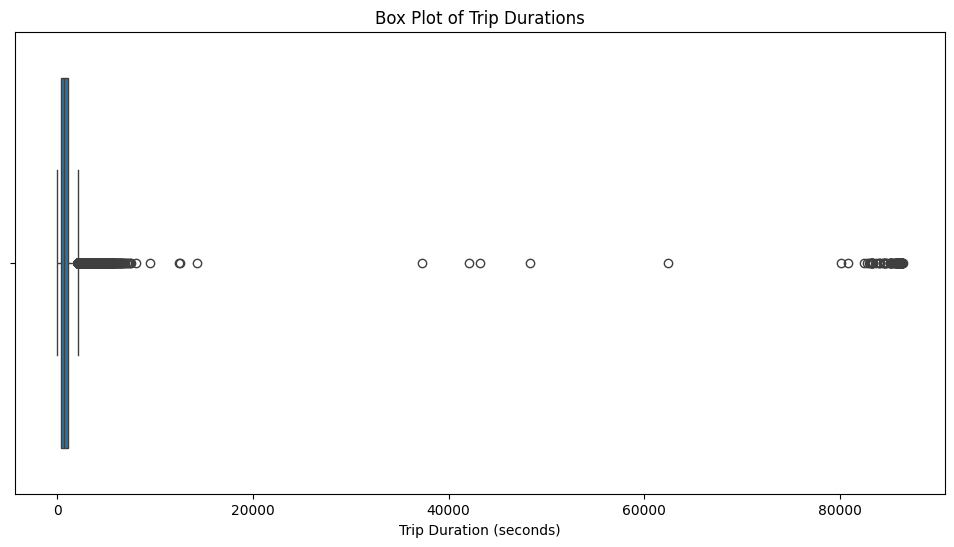

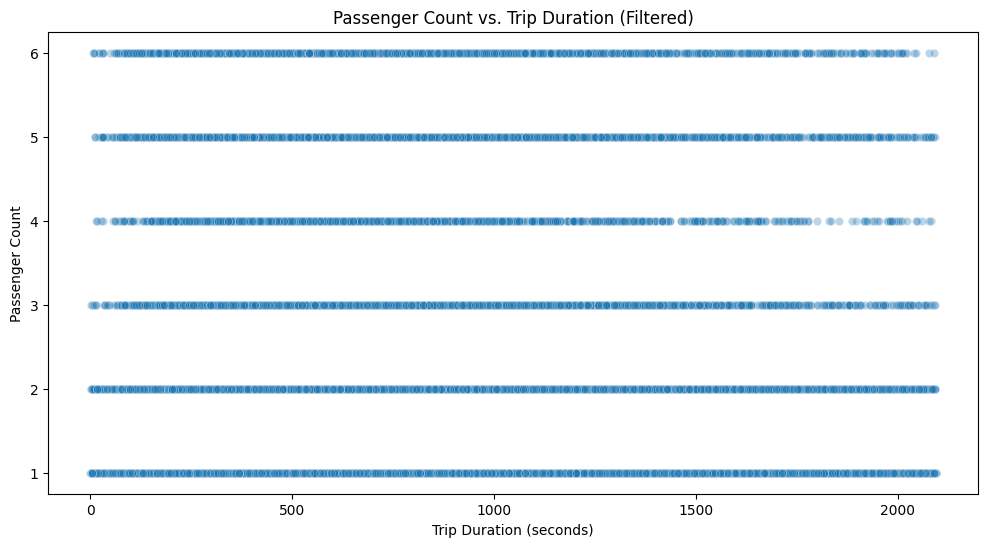

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to visualize the distribution of trip durations and handle outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=taxi_data['trip_duration'])
plt.title('Box Plot of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.savefig('box_plot_trip_durations.png')
plt.show()

# Remove outliers based on the box plot (e.g., trips longer than 1.5 times the interquartile range from the third quartile)
Q1 = taxi_data['trip_duration'].quantile(0.25)
Q3 = taxi_data['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = taxi_data[~((taxi_data['trip_duration'] < (Q1 - 1.5 * IQR)) | (taxi_data['trip_duration'] > (Q3 + 1.5 * IQR)))]

# Scatter plot to visualize the relationship between trip duration and passenger count
plt.figure(figsize=(12, 6))
sns.scatterplot(x=filtered_data['trip_duration'], y=filtered_data['passenger_count'], alpha=0.3)
plt.title('Passenger Count vs. Trip Duration (Filtered)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Passenger Count')
plt.savefig('passenger_count_vs_trip_duration_filtered.png')
plt.show()



### __Exploratory Data Analysis__ 
#### Passenger Count Analysis

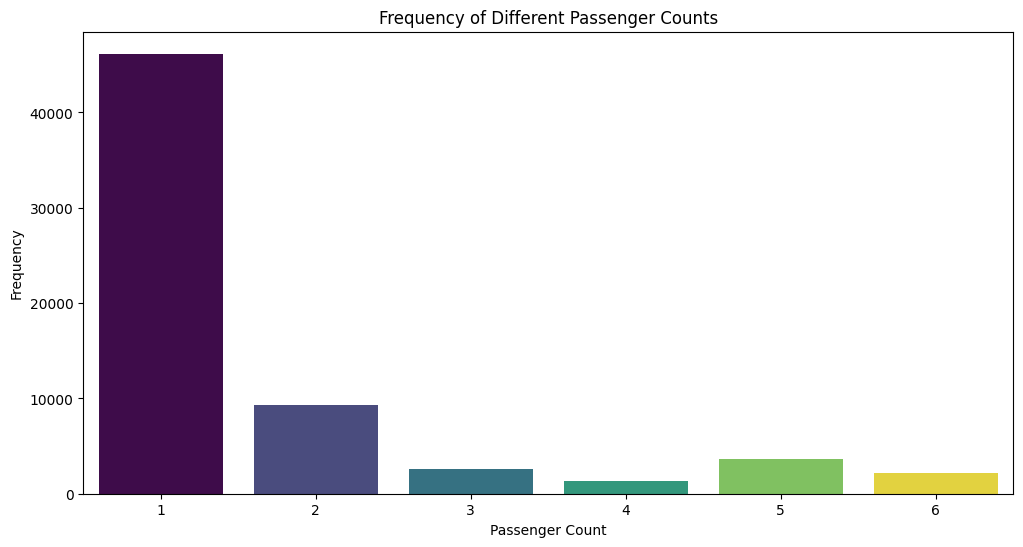

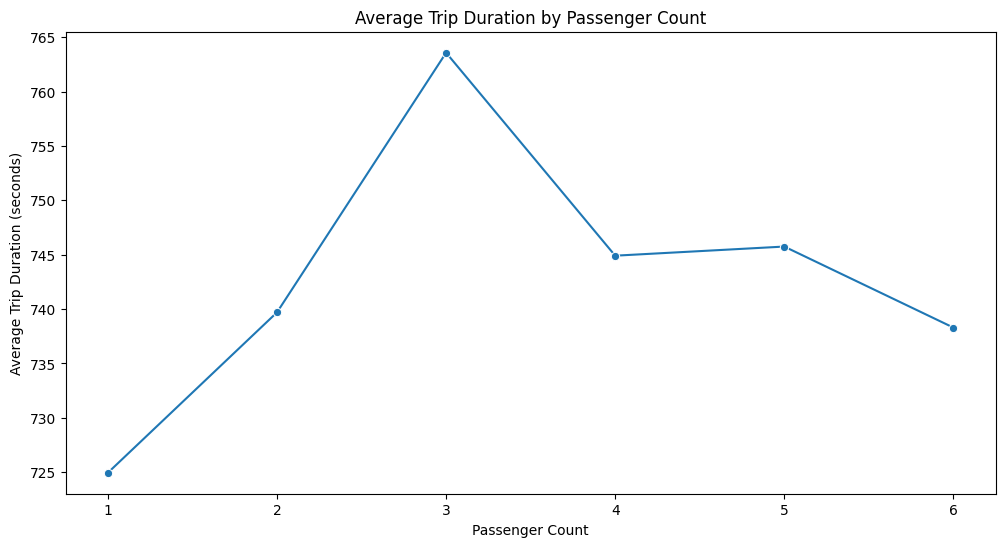

In [9]:
# Bar plot to visualize the frequency of different passenger counts
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='passenger_count', hue='passenger_count', palette='viridis', legend=False)
plt.title('Frequency of Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.savefig('frequency_passenger_counts.png')
plt.show()

# Line plot to visualize the average trip duration by passenger count
avg_trip_duration_by_passenger_count = filtered_data.groupby('passenger_count')['trip_duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_trip_duration_by_passenger_count, x='passenger_count', y='trip_duration', marker='o')
plt.title('Average Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Duration (seconds)')
plt.savefig('avg_trip_duration_by_passenger_count.png')
plt.show()


### __Exploratory Data Analysis__ 
#### Time-based Analysis 

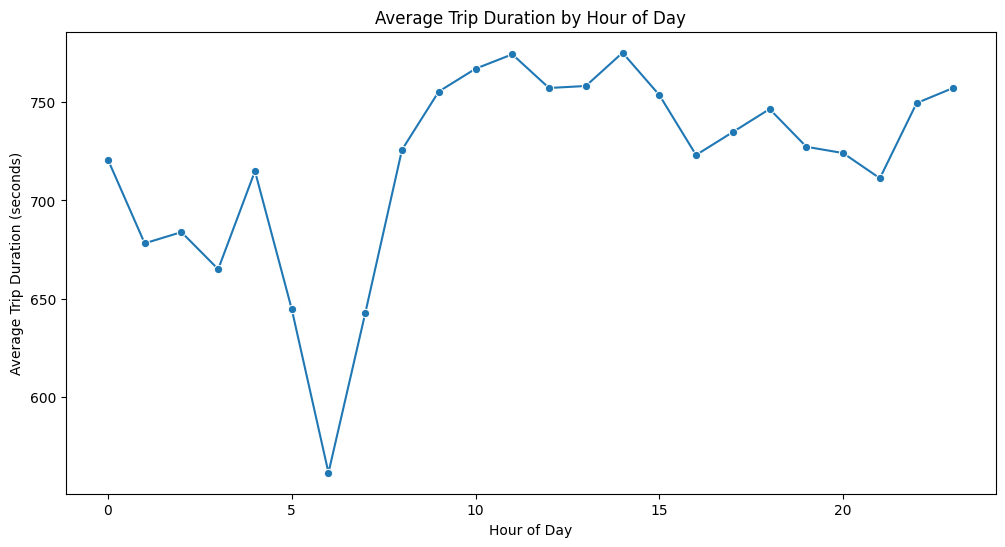

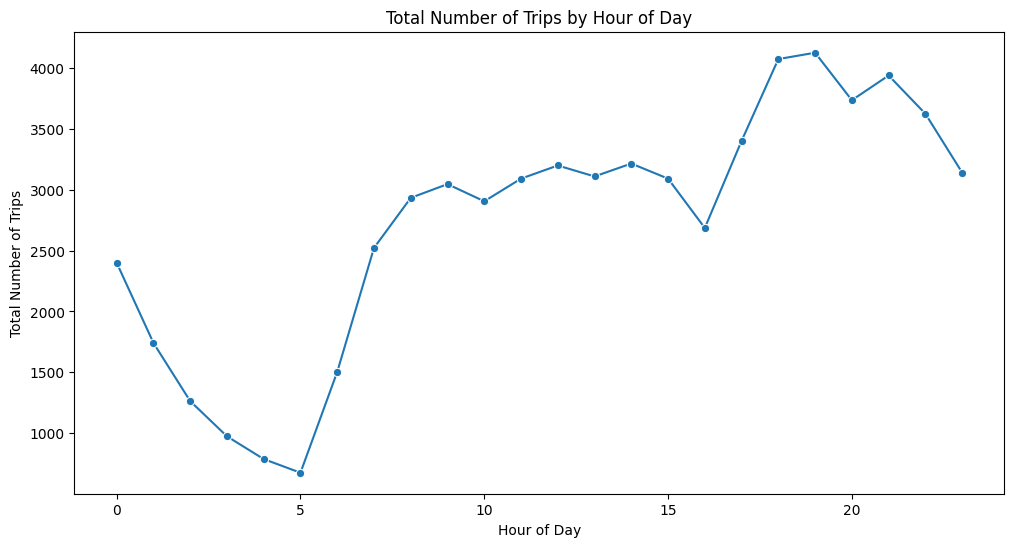

In [10]:
# Extract hour from pickup datetime
filtered_data.loc[:, 'pickup_hour'] = filtered_data['pickup_datetime'].dt.hour

# Line plot to visualize the average trip duration by hour of day
avg_trip_duration_by_hour = filtered_data.groupby('pickup_hour')['trip_duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_trip_duration_by_hour, x='pickup_hour', y='trip_duration', marker='o')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (seconds)')
plt.savefig('avg_trip_duration_by_hour.png')
plt.show()

# Line plot to visualize the total number of trips by hour of day
total_trips_by_hour = filtered_data.groupby('pickup_hour').size().reset_index(name='total_trips')
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_trips_by_hour, x='pickup_hour', y='total_trips', marker='o')
plt.title('Total Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Trips')
plt.savefig('total_trips_by_hour.png')
plt.show()


### __Key Takeaways__

- __Peak Hours for Taxi Trips:__ The highest volume of trips occurs in the late afternoon and early evening (5 PM to 7 PM). Conversely, the lowest volume occurs in the early morning hours (4 AM to 5 AM).

- __Average Trip Duration by Time of Day:__ Trip durations are shorter during early morning hours and tend to increase during the day, peaking in the evening. This pattern suggests potential congestion during peak hours.

- __Trip Duration Characteristics:__ The majority of NYC taxi trips are short, with a right-skewed distribution of trip durations. Significant outliers with very long trip durations may require further investigation.

- __Passenger Count Distribution:__ Most trips are taken by single passengers, with the frequency decreasing as the passenger count increases. Trips with more passengers tend to have slightly longer durations, especially for two or three passengers.